# LSHTM Reff comparisons

Here I compare the LSHTM Reff estimates produced by Price et al at different time points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')
from datetime import datetime as dt
from Reff_functions import *
from Reff_constants import *

In [9]:
df_R_old = read_in_Reff()
    
df_L_R = read_in_LSHTM()
df_cases = read_in_cases()

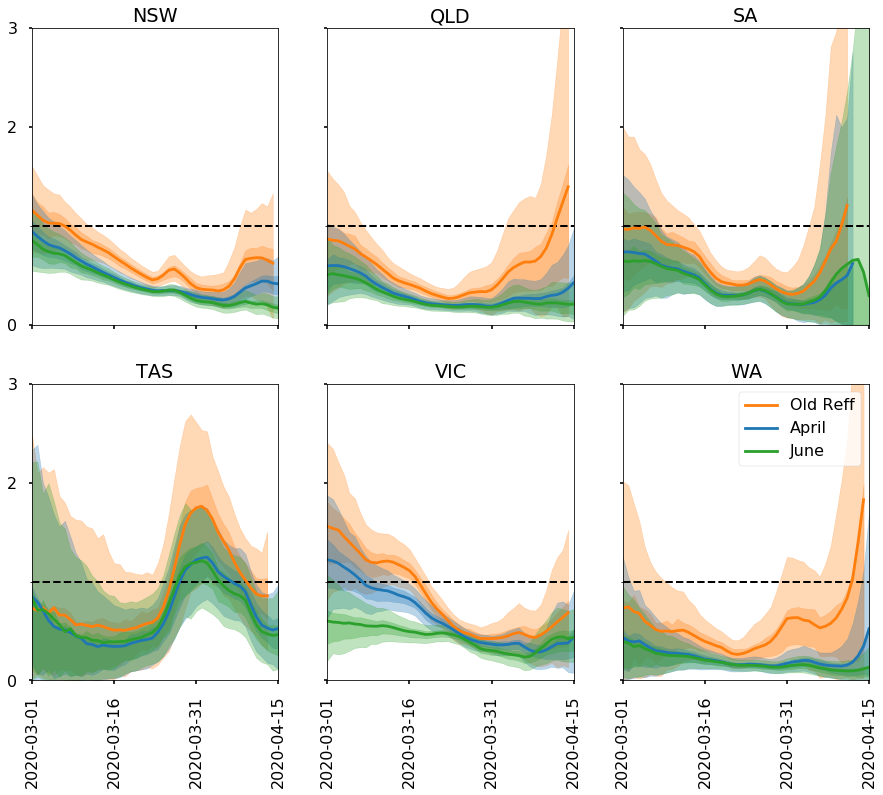

In [68]:
#plot each estimate
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-15')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_R_old.loc[(df_R_old.state==state) & (df_R_old.date.isin(date_filter))]
    
    df_april = df_L_R.loc[(df_L_R.date_of_analysis=='2020-04-26')&(df_L_R.state==state)]
    df_april = df_april.loc[df_april.date.isin(date_filter)]
    
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-06-28')&(df_L_R.state==state)]
    df_june = df_june.loc[(df_june.date.isin(date_filter))]
    
    plot_dfs ={
        'Old Reff':df_state,
        'April': df_april,
        'June':df_june,
    }
    colors = {
        'Old Reff':'C1',
        'April': 'C0',
        'June':'C2',
        
    }
    
    for label, df in plot_dfs.items():
        #plot old estimate
        ax[row,col].plot(df.date, df['median'], label=label,color=colors[label])
        ax[row,col].fill_between(df.date, df['bottom'], df['top'],color=colors[label], alpha=0.3)
        ax[row,col].fill_between(df.date, df['lower'], df['upper'],color=colors[label], alpha=0.3)


    
    
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    ax[row,col].xaxis.set_major_locator(plt.MaxNLocator(4))
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
    
plt.legend()
plt.show()

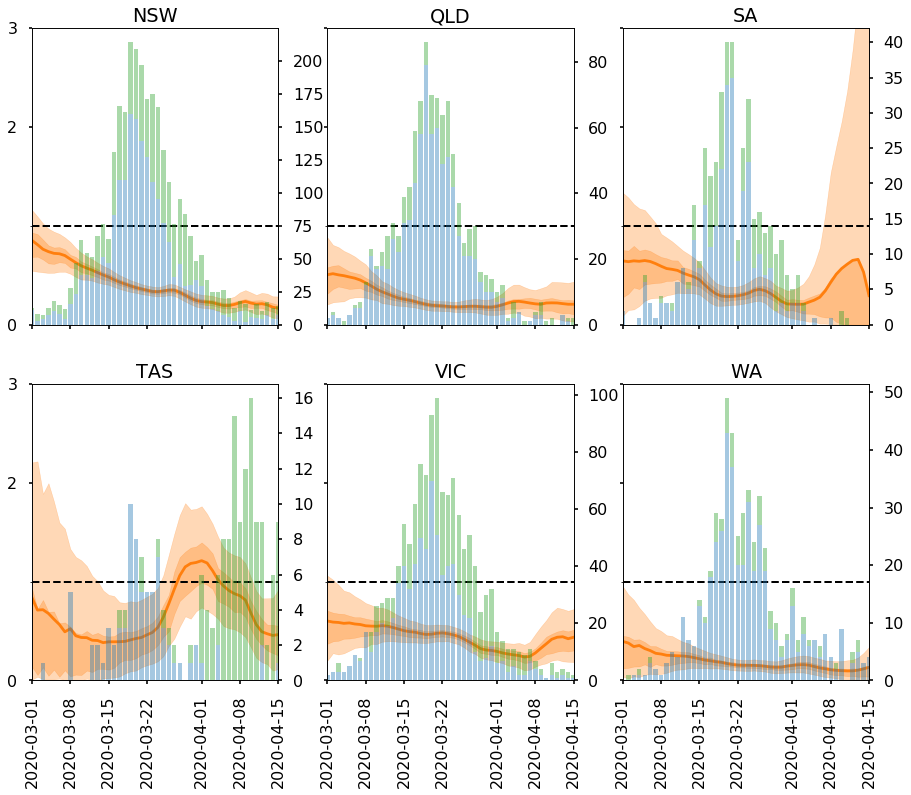

In [77]:
## plot cases over the top of Reff
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-15')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_cases.loc[(state)]

    df_state = df_state.loc[date_filter[0]:date_filter[-1]]
    #print(df_state.index)
    #df_state.index = pd.DatetimeIndex(df_state.index)
    
    #fill missing dates
#
    #df_state.index = df_state.reindex(date_filter, fill_value=0)
    df_state= df_state.asfreq('D')
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-06-28')&(df_L_R.state==state)]
    df = df_june.loc[(df_june.date.isin(date_filter))]
    

    #plot new estimate
    ax[row,col].plot(df.date, df['median'], label='June Reff',color='C1')
    ax[row,col].fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
    ax[row,col].fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
    ax2 = ax[row,col].twinx()
    ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4)
    ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4)
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    
        
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
    
plt.show()

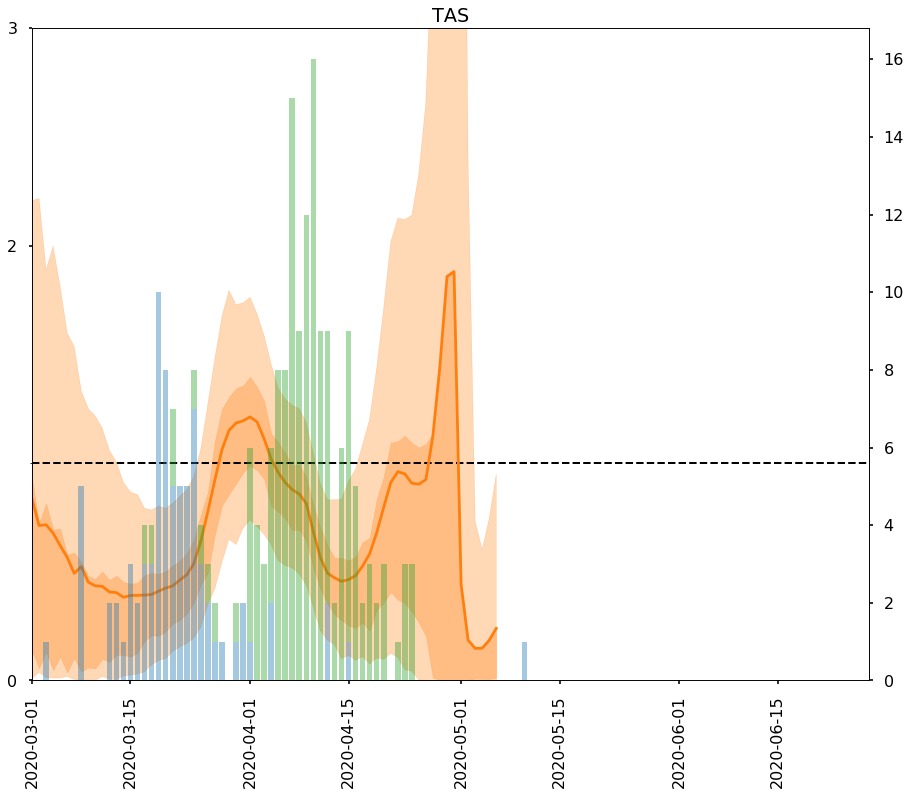

In [81]:
fig, ax = plt.subplots(figsize=(15,12))

date_filter = pd.date_range(start='2020-03-01',end='2020-06-28')
    
state = 'TAS'


#filters
df_state = df_cases.loc[(state)]

df_state = df_state.loc[date_filter[0]:date_filter[-1]]
#print(df_state.index)
#df_state.index = pd.DatetimeIndex(df_state.index)

#fill missing dates
#
#df_state.index = df_state.reindex(date_filter, fill_value=0)
df_state= df_state.asfreq('D')
df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-06-28')&(df_L_R.state==state)]
df = df_june.loc[(df_june.date.isin(date_filter))]


#plot new estimate
ax.plot(df.date, df['median'], label='June Reff',color='C1')
ax.fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
ax.fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
ax2 = ax.twinx()
ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4)
ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4)
#formatting
ax.set_title(state)


#grid line at R_eff =1
ax.set_yticks([1],minor=True,)
ax.set_yticks([0,2,3],minor=False)
ax.set_yticklabels([0,2,3],minor=False)
ax.yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
ax.set_ylim((0,3))
    
        

ax.tick_params(axis='x',rotation=90)
ax.set_xlim((date_filter[0],date_filter[-1]))
    
plt.show()

In [42]:
df_state.imported

STATE  date_inferred
NSW    2020-03-01        11
       2020-03-02         3
       2020-03-03         4
       2020-03-04         7
       2020-03-05        10
       2020-03-06         8
       2020-03-07         4
       2020-03-08        16
       2020-03-09        23
       2020-03-10        38
       2020-03-11        38
       2020-03-12        35
       2020-03-13        41
       2020-03-14        51
       2020-03-15        47
       2020-03-16        83
       2020-03-17       110
       2020-03-18       110
       2020-03-19       160
       2020-03-20       156
       2020-03-21       139
       2020-03-22       127
       2020-03-23       108
       2020-03-24        95
       2020-03-25        77
       2020-03-26        63
       2020-03-27        36
       2020-03-28        46
       2020-03-29        29
       2020-03-30        30
       2020-03-31        34
       2020-04-01        29
Name: imported, dtype: int64

In [10]:
df_state = df_R_old.loc[df_R_old.state=='SA']
df_state

,type,date,bottom,top,lower,upper,median,mean,std,prob_control,mean_window,sd_window,confidence,date_onset,state
235,nowcast,2020-01-21,0.259316,3.279421,1.119387,2.345085,1.668290,1.824104,1.118732,0.200000,4.500000,0.512989,1.000000,2020-01-26,SA
236,nowcast,2020-01-22,0.144080,4.602783,0.600378,2.034149,1.919519,2.252452,1.670315,0.250000,4.250000,0.839719,1.000000,2020-01-27,SA
237,nowcast,2020-01-23,0.326230,5.859900,0.401647,1.798402,1.730573,2.509421,2.222056,0.240000,3.800000,1.178030,1.000000,2020-01-28,SA
238,nowcast,2020-01-24,0.170466,4.171728,0.334870,1.639634,1.448808,2.025924,1.886282,0.355556,4.444444,1.430888,1.000000,2020-01-29,SA
239,nowcast,2020-01-25,0.020274,4.312477,0.131179,1.269310,1.259467,1.878525,1.761090,0.383333,4.333333,1.252449,1.000000,2020-01-30,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,nowcast,2020-04-07,0.051556,2.113123,0.146791,0.697176,0.641918,1.035570,1.325923,0.687751,3.309398,2.054374,0.565606,2020-04-12,SA
313,nowcast,2020-04-08,0.019478,2.815038,0.152954,0.827568,0.765397,1.270009,1.502148,0.612190,3.306998,2.057558,0.507986,2020-04-13,SA
314,nowcast,2020-04-09,0.042448,2.966941,0.211436,0.952018,0.842175,1.394134,1.817330,0.579262,3.333333,2.066051,0.464270,2020-04-14,SA
315,nowcast,2020-04-10,0.029920,3.611842,0.160153,1.078391,1.009180,1.655480,1.980836,0.496312,3.337589,2.051837,0.401190,2020-04-15,SA


In [36]:
df_cases

imported  local       rho
STATE date_inferred                           
ACT   2020-03-07            1      0  1.000000
      2020-03-10            0      2  0.000000
      2020-03-11            1      0  1.000000
      2020-03-12            2      1  0.666667
      2020-03-13            5      0  1.000000
...                       ...    ...       ...
WA    2020-06-12            1      0  1.000000
      2020-06-14            1      0  1.000000
      2020-06-18            1      0  1.000000
      2020-06-20            1      0  1.000000
      2020-06-22            1      0  1.000000

[557 rows x 3 columns]

In [25]:
date_filter

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31'],
              dtype='datetime64[ns]', freq='D')